In [3]:
#DATASET-https://www.kaggle.com/code/razamh/exploratory-data-analysis-terrorism

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import csv
warnings.filterwarnings("ignore")

In [5]:
terrorism_df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="latin1")

In [6]:
terrorism_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14254,198108290004,1981,8,29,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,PGIS,1.0,0.0,0.0,1.0,NaN
14255,198108290005,1981,8,29,NaN,0,NaN,15,Austria,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14256,198108290006,1981,8,29,NaN,0,NaN,94,Iran,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14257,198108290007,1981,8,29,NaN,0,NaN,94,Iran,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN


In [7]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 14259 rows and 135 columns in the dataset


In [8]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 135 columns in the data


In [10]:
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [11]:
terrorism_df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14254,198108290004,1981,8,29,NaN,0,NaN,97,Israel,10,...,NaN,NaN,NaN,NaN,PGIS,1.0,0.0,0.0,1.0,NaN
14255,198108290005,1981,8,29,NaN,0,NaN,15,Austria,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14256,198108290006,1981,8,29,NaN,0,NaN,94,Iran,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
14257,198108290007,1981,8,29,NaN,0,NaN,94,Iran,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN


In [12]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [13]:
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
14254,1981,8,29,Israel,Middle East & North Africa,Jerusalem,Jerusalem,Bombing/Explosion,Military,NaN,Palestinians,Explosives
14255,1981,8,29,Austria,Western Europe,Vienna,Vienna,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Unknown,Explosives
14256,1981,8,29,Iran,Middle East & North Africa,Fars,Kamfiruz,Facility/Infrastructure Attack,Business,Retail/Grocery/Bakery,Unknown,Incendiary
14257,1981,8,29,Iran,Middle East & North Africa,Tehran,Tehran,Unknown,Military,Military Barracks/Base/Headquarters/Checkpost,Unknown,Unknown


In [14]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [15]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [16]:
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [17]:
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [18]:
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
14254,1981,8,29,Israel,Middle East & North Africa,Jerusalem,Jerusalem,Bombing/Explosion,Military,others,Palestinians,Explosives
14255,1981,8,29,Austria,Western Europe,Vienna,Vienna,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Unknown,Explosives
14256,1981,8,29,Iran,Middle East & North Africa,Fars,Kamfiruz,Facility/Infrastructure Attack,Business,Retail/Grocery/Bakery,Unknown,Incendiary
14257,1981,8,29,Iran,Middle East & North Africa,Tehran,Tehran,Unknown,Military,Military Barracks/Base/Headquarters/Checkpost,Unknown,Unknown


In [19]:
terrorism_df.shape

(14259, 12)

In [20]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       1
Target_type       1
Target_subtype    0
Gang_name         1
Weapon_type       1
dtype: int64

In [21]:
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [22]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [23]:
terrorism_df.columns.nunique()

12

In [24]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 121 countries were noted in the data


In [25]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Middle Ea']


In [26]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)' nan]


In [27]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related' nan]


In [28]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown'
 'Black Nationalists' 'Tupamaros (Uruguay)' "New Year's Gang"
 'Weather Underground, Weathermen' 'Left-Wing Militants'
 'Armed Commandos of Liberation' 'Commune 1' 'Eritrean Liberation Front'
 'Strikers' 'Student Radicals' 'White extremists'
 'Armed Forces of National Liberation- Venezuela (FALN)'
 "New People's Army (NPA)"
 'Armed Revolutionary Independence Movement (MIRA)'
 'Popular Front for the Liberation of Palestine (PFLP)'
 'Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)'
 '1st of May Group' 'Rebel Armed Forces of Guatemala (FAR)' 'Ku Klux Klan'
 'Popular Revolutionary Vanguard (VPR)' 'Revolutionary Force 9'
 'Puerto Rican Nationalists' 'Chicano Liberation Front'
 'Puerto Rican Resistance Movement' 'Black Panthers'
 'Dominican Popular Movement (MPD)' 'Argentine Liberation Front (FAL)'
 'Argentine National Organization Movement (MANO)'
 'Japanese Red Army (JRA)' 'Saor Eire (Irish Republican Group)'
 'New W

In [29]:
print(terrorism_df['Gang_name'].nunique())

856


In [30]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other' nan]


In [31]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            14259 non-null  int64 
 1   Month           14259 non-null  int64 
 2   Day             14259 non-null  int64 
 3   Country         14259 non-null  object
 4   Region          14259 non-null  object
 5   State           14259 non-null  object
 6   City            14259 non-null  object
 7   Attack_type     14258 non-null  object
 8   Target_type     14258 non-null  object
 9   Target_subtype  14259 non-null  object
 10  Gang_name       14258 non-null  object
 11  Weapon_type     14258 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [32]:
terrorism_df.describe()

,Year,Month,Day
count,14259.000000,14259.000000,14259.000000
mean,1977.372537,6.181079,15.198261
std,3.143381,3.360118,8.980147
min,1970.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000
50%,1978.000000,6.000000,15.000000
75%,1980.000000,9.000000,23.000000
max,1986.000000,12.000000,31.000000


In [33]:
terrorism_df['Country'].value_counts().head(10)

United Kingdom    1861
United States     1587
El Salvador       1585
Italy             1181
Spain             1175
Colombia           659
Guatemala          632
France             612
Turkey             585
Nicaragua          345
Name: Country, dtype: int64

In [34]:
terrorism_df['Region'].value_counts().head(10)

Western Europe                 5625
Central America & Caribbean    2694
Middle East & North Africa     1746
North America                  1718
South America                  1562
Sub-Saharan Africa              374
Southeast Asia                  323
East Asia                        83
South Asia                       78
Eastern Europe                   30
Name: Region, dtype: int64

In [35]:
terrorism_df['State'].value_counts().head(10)

Northern Ireland    1677
San Salvador         860
Unknown              523
Lazio                448
California           420
New York             371
Basque Country       353
Guatemala            335
Paris                322
Buenos Aires         247
Name: State, dtype: int64

In [36]:
terrorism_df['Target_subtype'].value_counts().head(10)

others                                                     851
Police Security Forces/Officers                            728
Retail/Grocery/Bakery                                      664
Bank/Commerce                                              648
Politician or Political Party Movement/Meeting/Rally       642
Government Building/Facility/Office                        611
Military Personnel (soldiers, troops, officers, forces)    584
Religion Identified                                        564
Embassy/Consulate                                          539
Military Unit/Patrol/Convoy                                463
Name: Target_subtype, dtype: int64

In [37]:
terrorism_df['City'].value_counts().head(10)

Belfast           900
San Salvador      735
Unknown           647
Rome              429
New York City     346
Paris             323
Guatemala City    269
Madrid            221
Buenos Aires      208
Istanbul          186
Name: City, dtype: int64

In [38]:
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      6021
Assassination                          2903
Armed Assault                          2434
Facility/Infrastructure Attack         1371
Hostage Taking (Kidnapping)             747
Unknown                                 429
Hostage Taking (Barricade Incident)     243
Hijacking                                82
Unarmed Assault                          28
Name: Attack_type, dtype: int64

In [39]:
terrorism_df['Target_type'].value_counts().head(10)

Business                       3300
Private Citizens & Property    2202
Government (General)           1885
Military                       1667
Police                         1446
Government (Diplomatic)         870
Journalists & Media             443
Transportation                  442
Educational Institution         426
Airports & Aircraft             397
Name: Target_type, dtype: int64

In [40]:
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             4719
Irish Republican Army (IRA)                         1183
Basque Fatherland and Freedom (ETA)                  612
Farabundo Marti National Liberation Front (FMLN)     272
Palestinians                                         265
Protestant extremists                                206
Red Brigades                                         200
Sandinista National Liberation Front (FSLN)          197
Revolutionary Armed Forces of Colombia (FARC)        175
Ulster Volunteer Force (UVF)                         175
Name: Gang_name, dtype: int64

In [41]:
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    6175
Firearms      4799
Incendiary    1580
Unknown       1551
Melee           95
Name: Weapon_type, dtype: int64

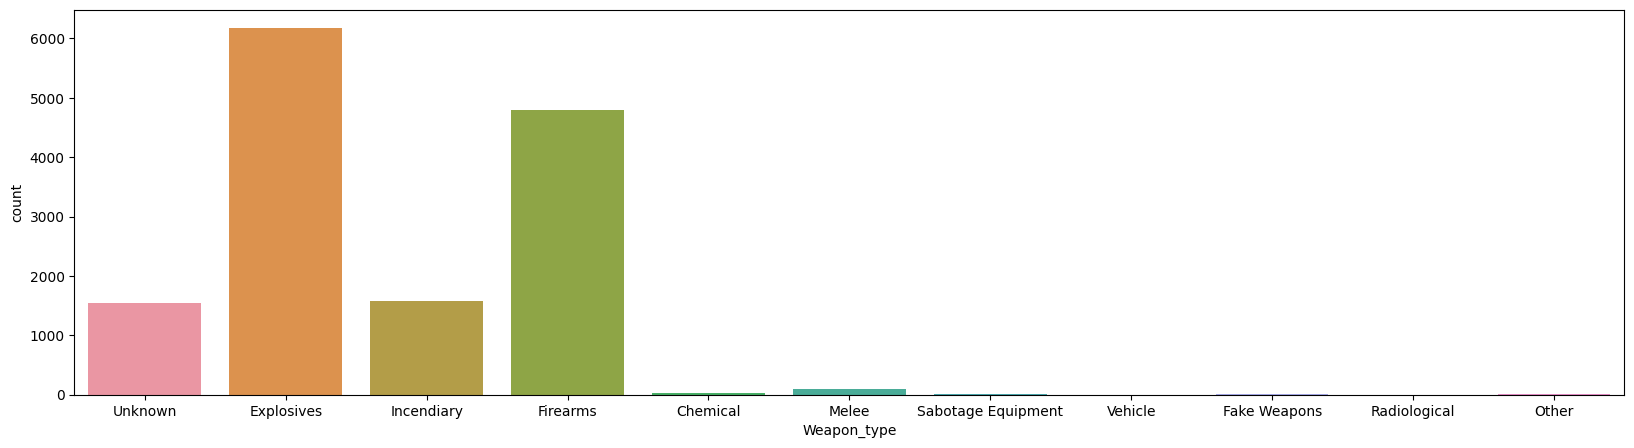

In [42]:
plt.figure(figsize=(20,5));
sns.countplot(x=terrorism_df.Weapon_type);

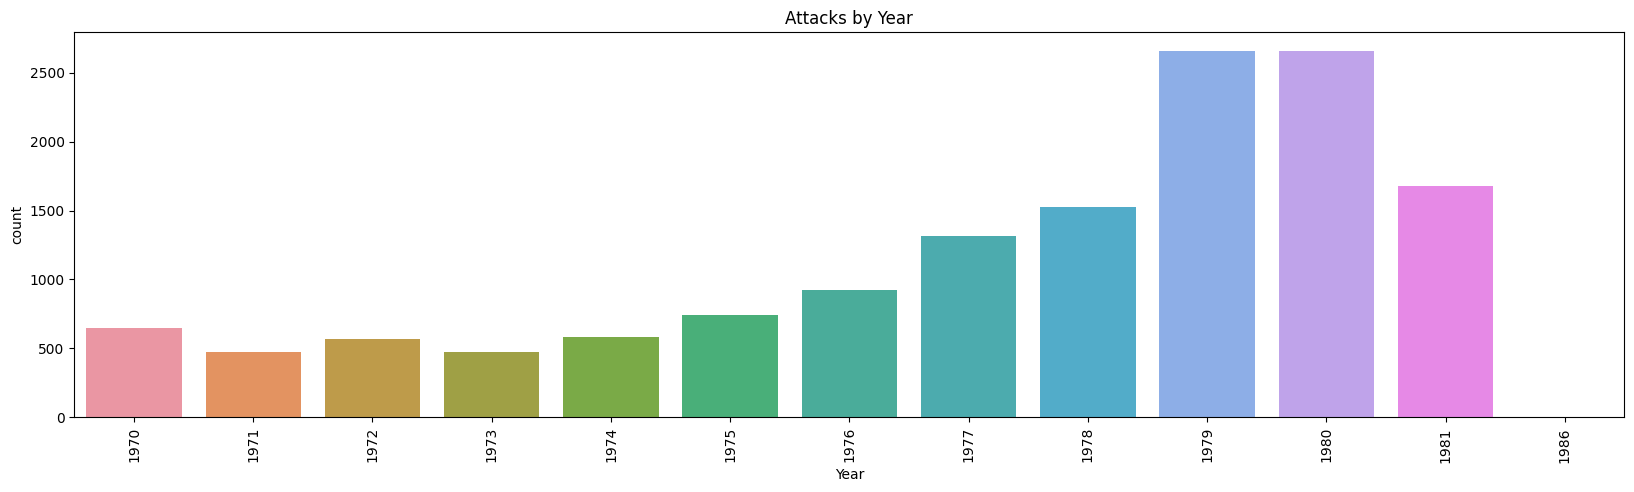

In [43]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism_df.Year);

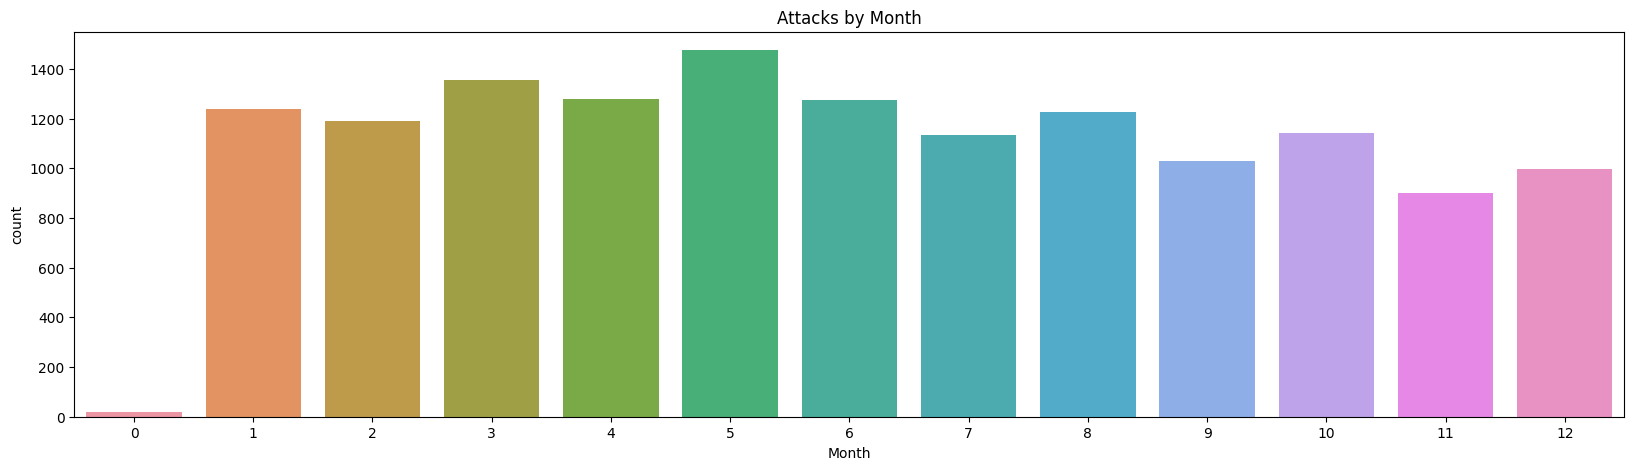

In [44]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=terrorism_df.Month);


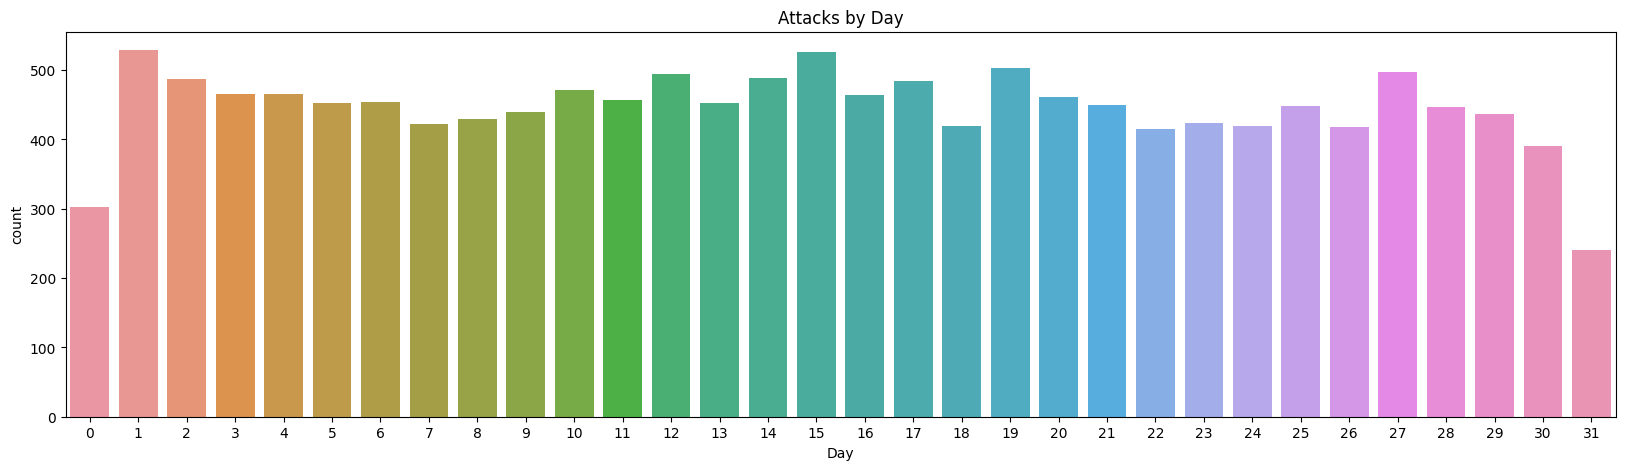

In [45]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day')
sns.countplot(x=terrorism_df.Day);

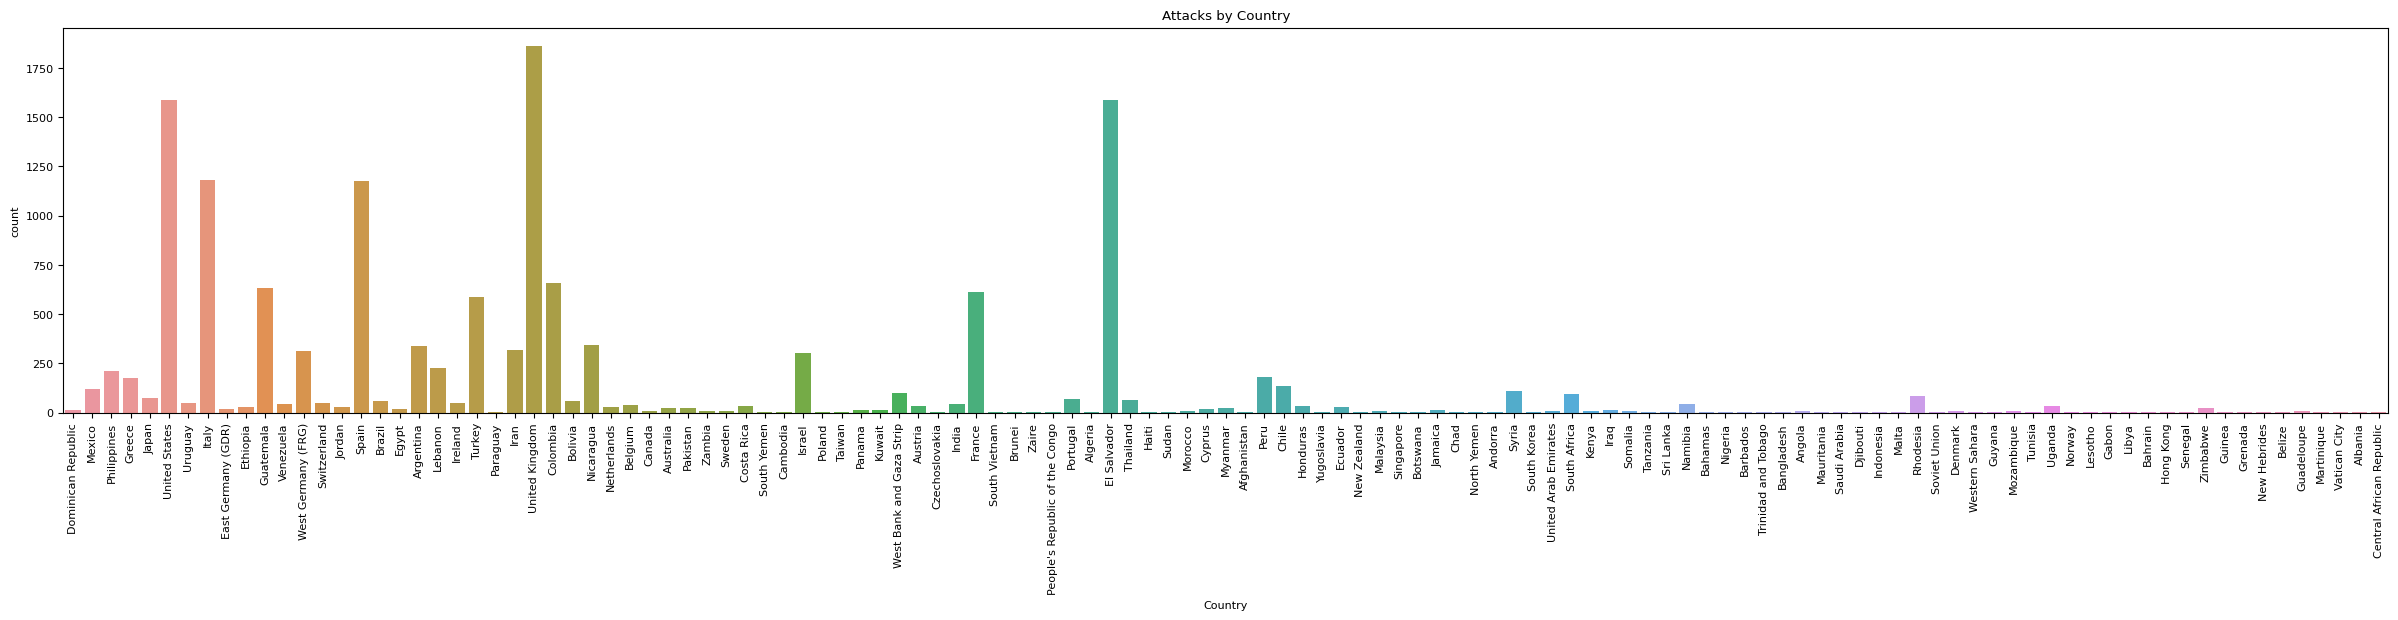

In [46]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=terrorism_df.Country);

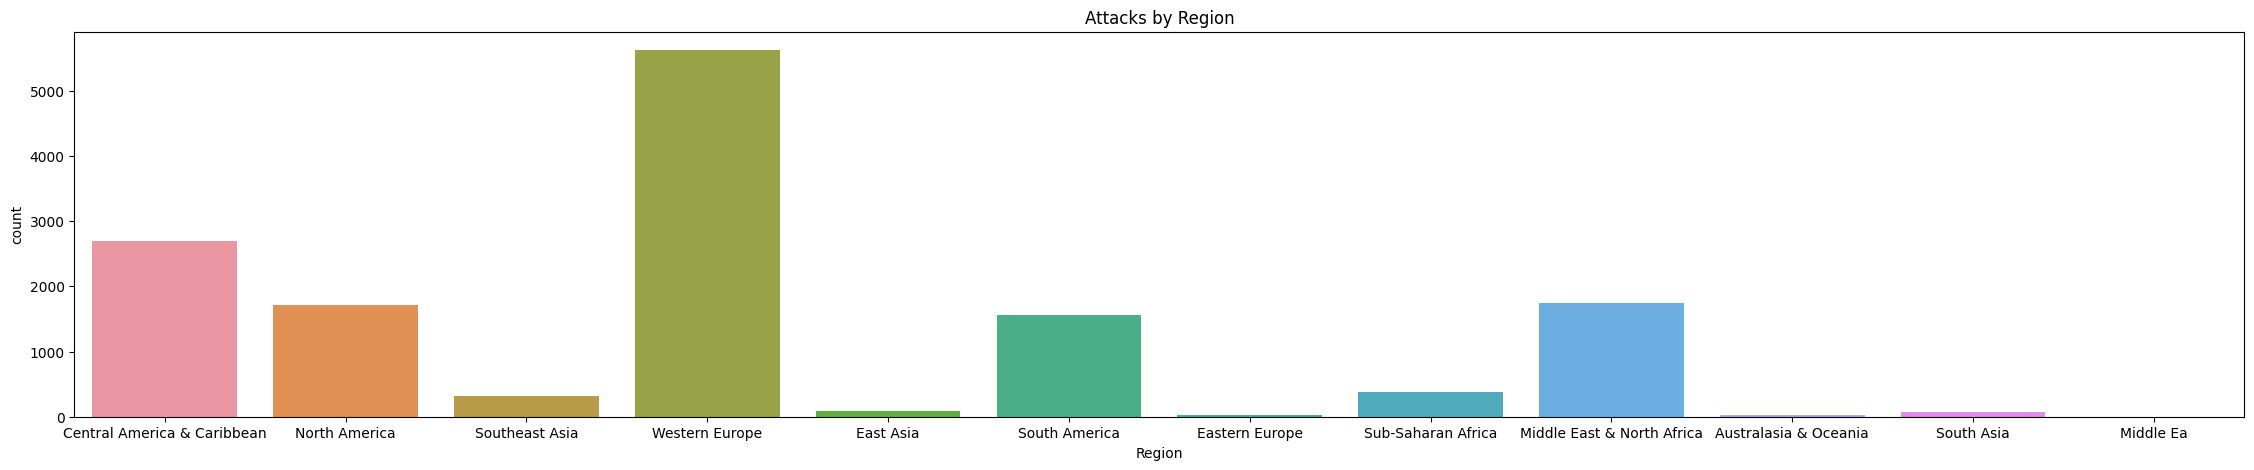

In [47]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=terrorism_df.Region);

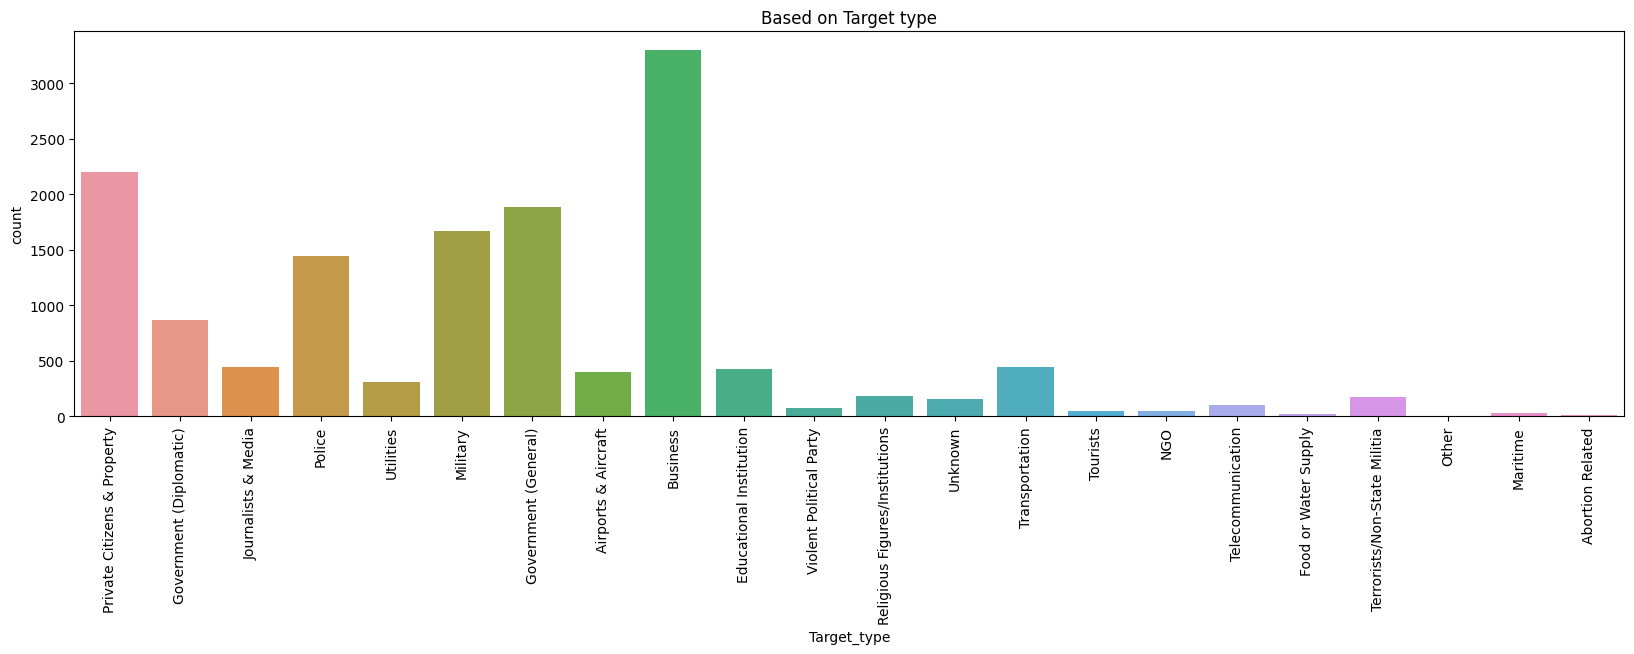

In [48]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=terrorism_df.Target_type);

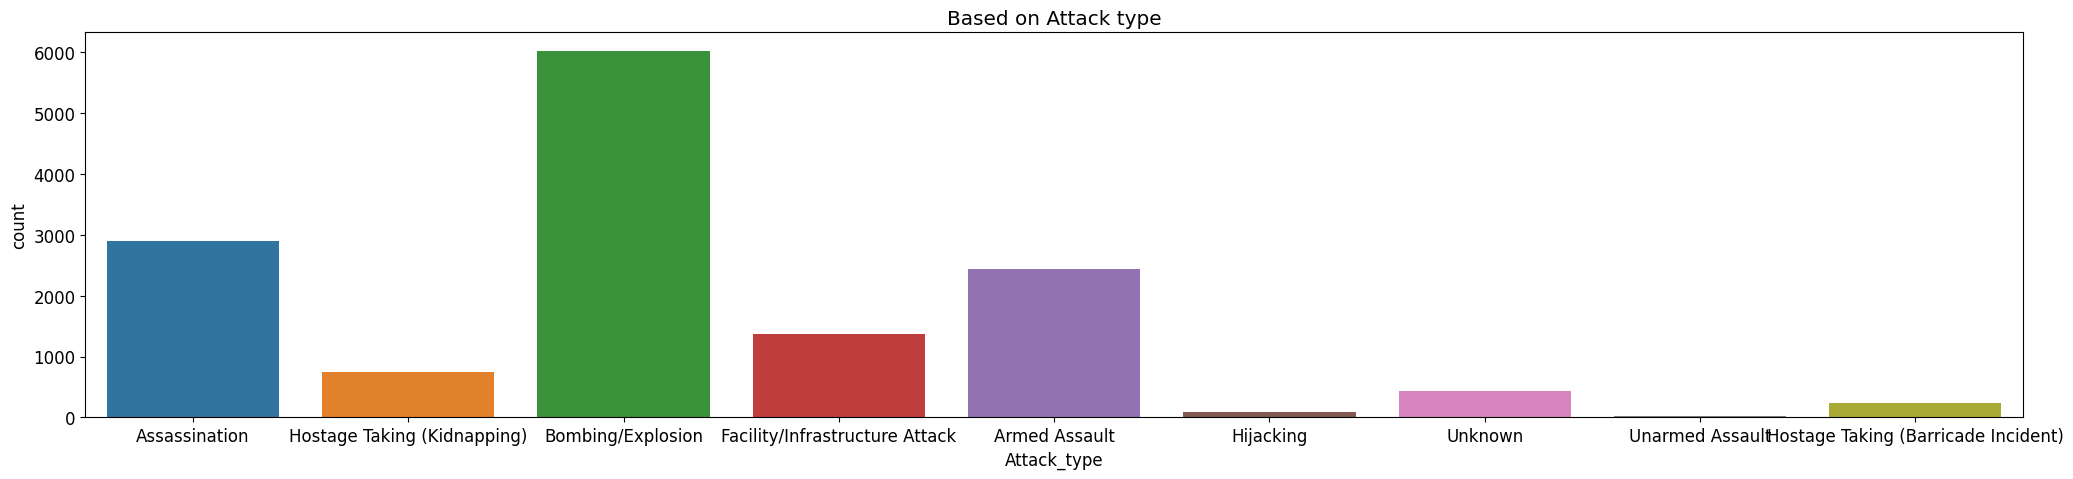

In [49]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=terrorism_df.Attack_type);